<a href="https://colab.research.google.com/github/Cdohyeon/AI/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/dataset/archive.zip -d /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (123).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (13).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (135).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (136).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (137).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (138).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (139).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (140).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (141).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (156).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (161).jpg  
  inflating: /content/FaceShape Dataset/testing_set/Heart/heart (163).jpg  
  inflating: /content/FaceShape Dataset/testing_set/H

In [ ]:
import torch ##
from torchvision.datasets import VisionDataset ##

from tqdm import tqdm
import os
import sys

from skimage import io, transform
import matplotlib.pyplot as plt
from torchvision import models ##


In [ ]:





dataset_path = "/content/FaceShape Dataset"
model_weight_save_path = "/content/models/"

num_classes = ('Heart', 'Oblong', 'Oval', 'Round',
           'Square')

batch_size = 32 ##
num_workers = 2
lr = 1e-3 ##런닝레이트



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:

from torch.utils.data import DataLoader ##
from torch import nn ##
from torchvision import transforms ##
import torchvision.datasets as datasets ##

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np

In [ ]:
traindir = os.path.join(dataset_path, 'training_set')
testdir = os.path.join(dataset_path, 'testing_set')

In [ ]:
train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.567,0.460,0.407),(0.266,0.239,0.234),inplace=False),
        #normalize,
    ]))


In [ ]:
test_dataset = datasets.ImageFolder(
    testdir,
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.562, 0.456, 0.403),(0.267, 0.240, 0.234),inplace=False),
        #normalize,
    ]))

In [ ]:
#transforms 안에 함수를 이용하여 정규화 할것
# train_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in train_dataset]
# train_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_dataset]

# train_meanR = np.mean([m[0] for m in train_meanRGB])
# train_meanG = np.mean([m[1] for m in train_meanRGB])
# train_meanB = np.mean([m[2] for m in train_meanRGB])
# train_stdR = np.mean([s[0] for s in train_stdRGB])
# train_stdG = np.mean([s[1] for s in train_stdRGB])
# train_stdB = np.mean([s[2] for s in train_stdRGB])


# val_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in test_dataset]
# val_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in test_dataset]

# val_meanR = np.mean([m[0] for m in val_meanRGB])
# val_meanG = np.mean([m[1] for m in val_meanRGB])
# val_meanB = np.mean([m[2] for m in val_meanRGB])

# val_stdR = np.mean([s[0] for s in val_stdRGB])
# val_stdG = np.mean([s[1] for s in val_stdRGB])
# val_stdB = np.mean([s[2] for s in val_stdRGB])

# print(train_stdR, train_stdG, train_stdB)
# print(val_stdR, val_stdG, val_stdB)
# print(train_meanR, train_meanG, train_meanB)
# print(val_meanR, val_meanG, val_meanB)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers, pin_memory=True, drop_last=False)

In [ ]:
trainiter = iter(train_loader)
image, label = trainiter.next()

In [ ]:
image.shape

torch.Size([32, 3, 244, 244])

In [ ]:
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size, shuffle=True,
    num_workers=num_workers, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


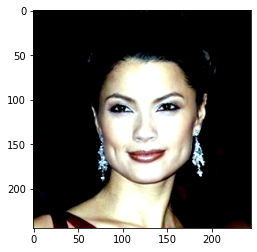

label :Square


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# set index of image : 0 ~ batch_size-1 사이 값 중에서 선택
index = 0

# show images
imshow(torchvision.utils.make_grid(images[index]))
# print labels
print('label :' + num_classes[labels[index]])


In [ ]:

images.size()

torch.Size([32, 3, 244, 244])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class mymodel(nn.Module):
    def __init__(self, num_classes: int = 5):
        super(mymodel, self).__init__()
        self.model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
        self.classifier = nn.Sequential(
            nn.Linear(1000,256),
            torch.nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            torch.nn.BatchNorm1d(128),
            nn.Linear(128, num_classes),
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.model(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


res = mymodel().to(device)
print(res)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

mymodel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [ ]:
from torchsummary import summary as summary_

summary_(res, (3, 244, 244), batch_size = 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 122, 122]           9,408
       BatchNorm2d-2         [32, 64, 122, 122]             128
              ReLU-3         [32, 64, 122, 122]               0
         MaxPool2d-4           [32, 64, 61, 61]               0
            Conv2d-5           [32, 64, 61, 61]          36,864
       BatchNorm2d-6           [32, 64, 61, 61]             128
              ReLU-7           [32, 64, 61, 61]               0
            Conv2d-8           [32, 64, 61, 61]          36,864
       BatchNorm2d-9           [32, 64, 61, 61]             128
             ReLU-10           [32, 64, 61, 61]               0
       BasicBlock-11           [32, 64, 61, 61]               0
           Conv2d-12           [32, 64, 61, 61]          36,864
      BatchNorm2d-13           [32, 64, 61, 61]             128
             ReLU-14           [32, 64,

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() ##오차 loss 오차계산 크로스 엔트로피
optimizer = optim.Adam(res.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [ ]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
   
    for i, (input, label) in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = input.to(device), label.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = res(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.063
[2,   100] loss: 0.043
[3,   100] loss: 0.035
Finished Training


In [ ]:
PATH = './face_res.pth'
torch.save(res.state_dict(), PATH)
sample_path = "/content/drive/MyDrive/data/main/dataset"

In [ ]:
sample_dataset = datasets.ImageFolder(
    sample_path,
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        #normalize,
    ]))

In [ ]:
sample_loader = torch.utils.data.DataLoader(
    sample_dataset,
    batch_size=1, shuffle=False,
    num_workers=num_workers, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


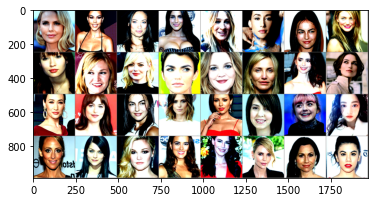

GroundTruth:   Oval Heart Square Oblong


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % num_classes[labels[j]] for j in range(4)))

In [ ]:
res = mymodel().to(device)
res.load_state_dict(torch.load('/content/drive/MyDrive/face_res.pth'))
res.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


mymodel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % num_classes[predicted[j]]
                              for j in range(4)))

IndexError: ignored

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for input, label in test_loader:
        images, labels = input.to(device), label.to(device)
        # calculate outputs by running images through the network
        outputs = res(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in num_classes}
total_pred = {classname: 0 for classname in num_classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = res(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[num_classes[label]] += 1
            total_pred[num_classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class Heart is: 79.5 %
Accuracy for class Oblong is: 42.5 %
Accuracy for class Oval  is: 38.0 %
Accuracy for class Round is: 81.0 %
Accuracy for class Square is: 24.0 %


In [ ]:
sampleiter = iter(sample_loader)
image, label = sampleiter.next()

In [ ]:
predict = res(image.to(device))

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in num_classes}
total_pred = {classname: 0 for classname in num_classes}
index = []
count = 0
# again no gradients needed
with torch.no_grad():
    for data in sample_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = res(images)
        _, predicted = torch.max(predict.data, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[num_classes[label]] += 1
            total_pred[num_classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / 1
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))
    count += 1
    if accuracy >1 :
      break


Accuracy for class Heart is: 100.0 %


tensor([0], device='cuda:0')
Hart


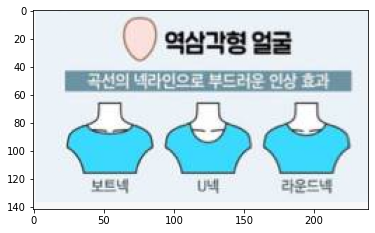

In [ ]:
def neckLine(count):
    print(labels)
    if count == 1:
      Heart = plt.imread("/content/drive/MyDrive/neck/Heart.png")
      plt.imshow(Heart);
      print('Hart')
    elif count == 2:
      Oblong = plt.imread("/content/drive/MyDrive/neck/Oblong.png")
      plt.imshow(Oblong);
      print('Oblong')
    elif count == 3:
      Oval = plt.imread("/content/drive/MyDrive/neck/Oval.png")
      plt.imshow(Oval);
      print('Oval')
    elif count == 4:
      Round = plt.imread("/content/drive/MyDrive/neck/Round.png")
      plt.imshow(Round);
      print('Round')
    elif count == 5:
      Square = plt.imread("/content/drive/MyDrive/neck/Square.png")
      plt.imshow(Square);
      print('Square')
    else:
      print('none')

neckLine(count)